### Convolutional Neural Networks (CNNs)

Let's explore CNN components. First we see how convolution layers work.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D

In [2]:
# create an array to which we'll apply the filter
data = np.asarray([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

keras expects 1D arrays to come in a 3D package. The first dimension is for the sample (i.e. one sample among many), the second dimension is for the length of each array, and the third dimension is for the channel (as in color).

In [3]:
data = data.reshape(1, 10, 1)

Sequential is a class from keras that lets us stack together layer one-at-a-time into a single model. Conv1D and Conv2D are convolusional layers for application to sets of 1D and 2D arrays respectively.

In [4]:
model = Sequential()

We'll use one filter with a length of 3, so we'll add one convolution layer to our model.

In [5]:
model.add(Conv1D(1, 3, input_shape=(10, 1)))

In [15]:
# define an edge detector. The final weight is a bias, added to all outputs.
weights = [np.asarray([[[0]],[[-1]],[[1]]]), np.asarray([0])]

In [16]:
# store the weights in the model
model.set_weights(weights)

In [17]:
print(model.get_weights())

[array([[[ 0.]],

       [[-1.]],

       [[ 1.]]], dtype=float32), array([0.], dtype=float32)]


In [18]:
# apply filter to input data
yhat = model.predict(data)
print(yhat)

1/1 [==============================] - 0s 10ms/step
[[[ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [-1.]
  [ 0.]
  [ 0.]]]


Of course, we're really just detecting 1s, and not detecting edges.

In [80]:
weights = [np.asarray([[[-1]],[[1]],[[0]]]), np.asarray([0])]
model.set_weights(weights)
yhat = model.predict(data)
print(yhat)

1/1 [==============================] - 0s 22ms/step
[[[ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [-1.]
  [ 0.]]]


There are some edges.

Note that the output is smaller than the input. If we wanted to ensure the output had the same size as the input (as in the Mario picture from the video Monday), we could pad the border of our data with 0s before applying the convolution filter.

Now we'll apply a filter to a two-dimensional array.

In [19]:
# define input data
data = np.asarray(
    [[[0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0],
      [0, 0, 0, 1, 1, 0, 0, 0]],
     
     [[0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [1, 1, 1, 1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1, 1, 1, 1],
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]]])

data = data.reshape(2, 8, 8, 1)

In [20]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))

In [21]:
# define a vertical line detector
detector = [[[[-1]],[[1]],[[0]]],
            [[[-1]],[[1]],[[0]]],
            [[[-1]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [22]:
# apply filter to input data
yhat = model.predict(data)

1/1 [==============================] - 0s 21ms/step


We have a 2x6x6x1 output.

In [23]:
yhat.shape

(2, 6, 6, 1)

We can arrange the output into a 2D grids for nice printing.

In [27]:
# first input grid, vertical edge detector
print(yhat[0,:,:,:].reshape(6,6))

[[ 0.  0.  3.  0. -3.  0.]
 [ 0.  0.  3.  0. -3.  0.]
 [ 0.  0.  3.  0. -3.  0.]
 [ 0.  0.  3.  0. -3.  0.]
 [ 0.  0.  3.  0. -3.  0.]
 [ 0.  0.  3.  0. -3.  0.]]


In [29]:
# second input grid (horizontal stripe), vertical edge detector
print(yhat[1,:,:,0])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


See that our filter identifies vertical edges but ignores horizontal edges. We can make a filter to detect horizontal edges and ignore vertical edges.

In [30]:
# let's include two filters with this model
model = Sequential()
model.add(Conv2D(2, (3,3), input_shape=(8, 8, 1)))

# define vertical and horizontal line detectors
detector = [[[[-1,-1]],[[1,-1]],[[0,-1]]],
            [[[-1,1]],[[1,1]],[[0,1]]],
            [[[-1,0]],[[1,0]],[[0,0]]]]
            
# our bias vector must have two components
weights = [np.asarray(detector), np.asarray([0.0,0])]
model.set_weights(weights)

In [31]:
# apply filter to input data
yhat = model.predict(data)

1/1 [==============================] - 0s 30ms/step


In [32]:
yhat.shape

(2, 6, 6, 2)

In [35]:
# see the effects of the filters on the first input array
yhat[:,:,:,0]

array([[[ 0.,  0.,  3.,  0., -3.,  0.],
        [ 0.,  0.,  3.,  0., -3.,  0.],
        [ 0.,  0.,  3.,  0., -3.,  0.],
        [ 0.,  0.,  3.,  0., -3.,  0.],
        [ 0.,  0.,  3.,  0., -3.,  0.],
        [ 0.,  0.,  3.,  0., -3.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]]], dtype=float32)

In [28]:
# see the effects of the filters on the second input array
yhat[:,:,:,1]

array([[[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  3.,  3.,  3.,  3.,  3.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [-3., -3., -3., -3., -3., -3.]]], dtype=float32)

### Pooling

Pooling is an operation done to a numeric grid (e.g. image), similar to applying a convolution. However, the pooling filter is usually 2x2 and applied with a stride of 2 (no overlap between applications). For each 2x2 subgrid of our image, a scalar is produced. The image is thus down sampled by a factor of 4. Max pooling takes the max of of the four pixels, while average pooling takes the average of the four pixels.

The utility of pooling is that sometimes features we're trying to detect may change their location slightly within an image. The down sampling involved in pooling gives us a margin of error for the location of features we're detecting.

Let's start with an example using max pooling.

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D

As before, we create the data. A 2D array is reshaped to 1 point x 8 rows x 8 columns x 1 channel.

In [ ]:
detector = [[[[0]],[[-1]],[[1]]],
            [[[0]],[[-1]],[[1]]],
            [[[0]],[[-1]],[[1]]]]

In [41]:
data = [[0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0]]
data = np.asarray(data).reshape(1, 8, 8, 1)

# create model and add a convolution layer
model = Sequential()
model.add(Conv2D(1, (3,3), activation=None, input_shape=(8, 8, 1)))

# add a pooling layer. switch between max and average, and observe the results
# model.add(MaxPooling2D())
model.add(AveragePooling2D())

# summarize model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 1)           0         
 gePooling2D)                                                    
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# define a vertical line detector
detector = [[[[0]],[[-1]],[[1]]],
            [[[0]],[[-1]],[[1]]],
            [[[0]],[[-1]],[[1]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 22ms/step
[1.5, 0.0, -1.5]
[1.5, 0.0, -1.5]
[1.5, 0.0, -1.5]


Check these results by hand. Can you figure out why the right-most column is still 0s even when we use average pooling? Shouldn't we be taking the average of a negative value and 0?

In [43]:
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

In [44]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) # output layer
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [45]:
model = define_model()

In [49]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
x_tr = x_tr.reshape((x_tr.shape[0], 28, 28, 1))
x_te = x_te.reshape((x_te.shape[0], 28, 28, 1))

In [51]:
y_tr = to_categorical(y_tr) # changes each outcome (integer) into a 1x10 binary array
y_te = to_categorical(y_te)

In [53]:
# scale the data
x_tr = x_tr / 255

In [54]:
x_te = x_te / 255

In [55]:
model.fit(x_tr,y_tr)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1743 - accuracy: 0.9470


In [56]:
model.evaluate(x_te,y_te)

313/313 [==============================] - 0s 977us/step - loss: 0.0855 - accuracy: 0.9732


[0.08554726094007492, 0.9732000231742859]

In [57]:
filters, biases = model.layers[0].get_weights()

We have a bias vector with 32 entries.

In [58]:
biases.shape

(32,)

We have 32 filters, each 3x3x1 (grayscale).

In [60]:
filters.shape

(3, 3, 1, 32)

Here are some of the filters.

In [61]:
print(filters[:,:,:,0].reshape(3,3))
print(filters[:,:,:,1].reshape(3,3))

[[ 0.2480788  -0.12945576  0.04050868]
 [ 0.36962438  0.56229776 -0.24102975]
 [-0.37411943  0.66207534 -0.14108403]]
[[-0.47312313 -0.07064794 -0.21087766]
 [-0.6399599  -0.02014964  0.8267993 ]
 [-0.5691011   0.26392984  0.3229719 ]]


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

We can visualize them with seaborn.

<Axes: >

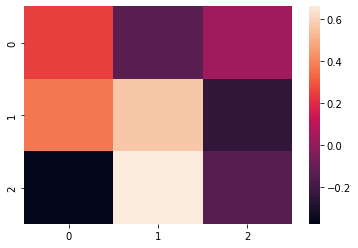

In [63]:
sns.heatmap(filters[:,:,:,0].reshape(3,3))

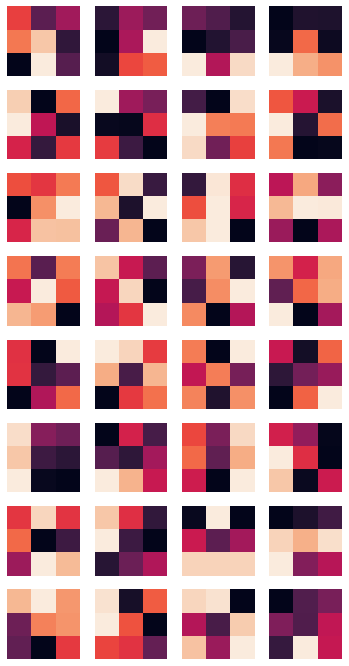

In [64]:
fig,axes = plt.subplots(8,4,figsize = (6,12))
for idx in range(32):
    sns.heatmap(filters[:,:,:,idx].reshape(3,3),ax=axes[idx//4,idx%4],cbar = False)
plt.setp(axes, xticks=[], yticks=[]);

Read more [here](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/).